**Import the data we already cleaned in milestone 2 and 3**

In [ ]:
import pandas as pd
df = pd.read_csv("D:\Local Restaurant Sales\Local-Restautant-Sales\Project.csv")
df.head()

,Unnamed: 0,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,0,1,2022-07-03,Aalopuri,Fastfood,20,13,260,Cash,Mr.,Night
1,1,2,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,2,3,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,3,4,2023-02-03,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,4,5,2022-10-02,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [2]:
df = df.drop('Unnamed: 0', axis = 1)
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,2022-07-03,Aalopuri,Fastfood,20,13,260,Cash,Mr.,Night
1,2,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,2023-02-03,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,2022-10-02,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [14]:
df.tail()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
995,996,2023-03-19,Frankie,Fastfood,50,10,500,Online,Mrs.,Evening
996,997,2022-09-20,Sandwich,Fastfood,60,7,420,Online,Mr.,Evening
997,998,2023-01-26,Sandwich,Fastfood,60,13,780,Online,Mr.,Evening
998,999,2022-08-27,Panipuri,Fastfood,20,5,100,Online,Mrs.,Afternoon
999,1000,2022-05-29,Aalopuri,Fastfood,20,3,60,Online,Mrs.,Midnight


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    1000 non-null   object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [4]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            1000 non-null   int64         
 1   date                1000 non-null   datetime64[ns]
 2   item_name           1000 non-null   object        
 3   item_type           1000 non-null   object        
 4   item_price          1000 non-null   int64         
 5   quantity            1000 non-null   int64         
 6   transaction_amount  1000 non-null   int64         
 7   transaction_type    1000 non-null   object        
 8   received_by         1000 non-null   object        
 9   time_of_sale        1000 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 78.2+ KB


In [5]:
import scipy
from scipy.stats import skew
df_numerical= df[['item_price', 'quantity', 'transaction_amount']]
df_skew = skew(df_numerical)
print("Skewness", df_skew)

Skewness [ 0.62406658 -0.05122249  1.05106356]


#### Interpretation
- item_price has a skewness of 0.624, since it is positive -> the distribution has a longer tail on the right side. It is slightly right-skewed but close to symmetric
- quantity has a skewness of -0.051, which is a slight negative skewness -> Distribution is quite symmetric, as the value is very close to 0
- transaction_amount has a skewness of 1.051, which is  positive -> Distribution is moderately reight-skewed, having a longer tail on the right side

### Construct and interpret histograms and plots for normality

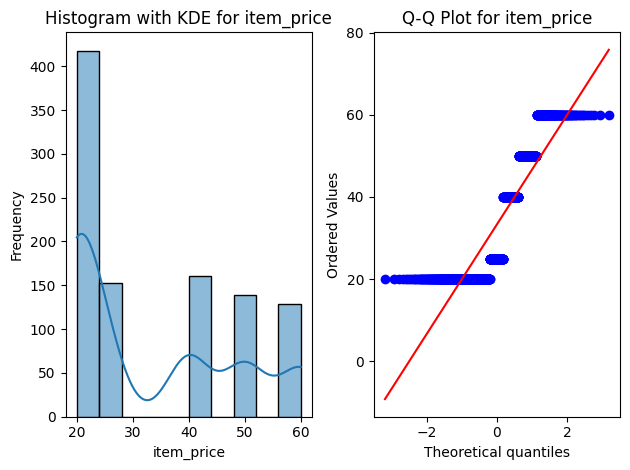

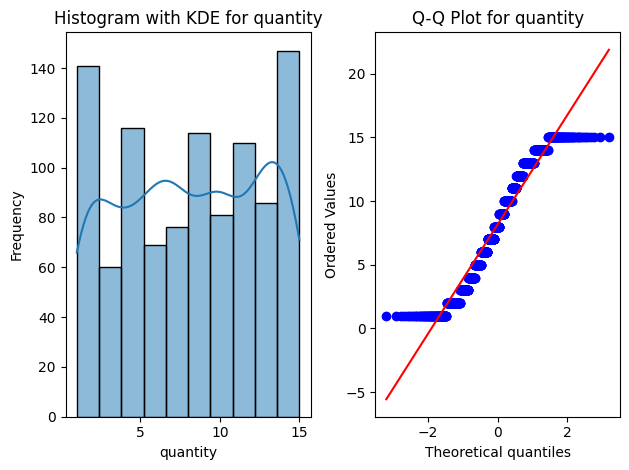

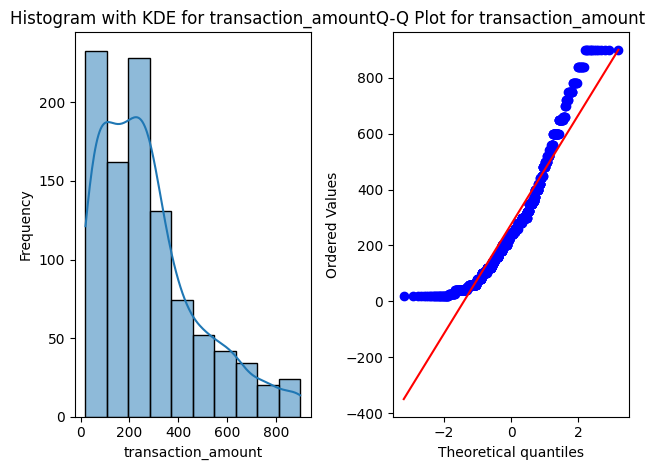

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot


for col in df_numerical.columns:
    plt.figure()
    plt.subplot(1, 2, 1)
    sns.histplot(df_numerical[col], kde=True, bins=10)
    plt.title(f'Histogram with KDE for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    probplot(df_numerical[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {col}')
    plt.tight_layout()
    plt.show()


- item_price: the distribution on histogram is right_skewed, as indicated by a peak on the left (around 20) and a tail stretching towards higher values (60+). The KDE line shows that item_price has non-normal distribution with multiples peaks. Based on the QQ plot, item_price doesn't have normal distribution as it has right skewness
- quantity: For histogram, the distribution is quite uniform, with no clear peak or bellshape structure. The KDA line doesn't follow a normal bell curve. Based on QQ plot, the points generally align with the diagonal red line but show some deviation. The data is roughly symmetric and follows a normal distribution. Quantity is more symmetric than item_price but lacks a clear normal distribution because of its uniform nature.
- transaction_amount: Using the histogram, the distribution iss strongly right-skewed, with a peak at lower values and a long tail towards higher values. The KDE line shows the skewness and lack of symmetry. Based on the QQ plot, the points deviate significantly from the diagonal red line, particularly at the upper tail (right skew). It means transaction_amount


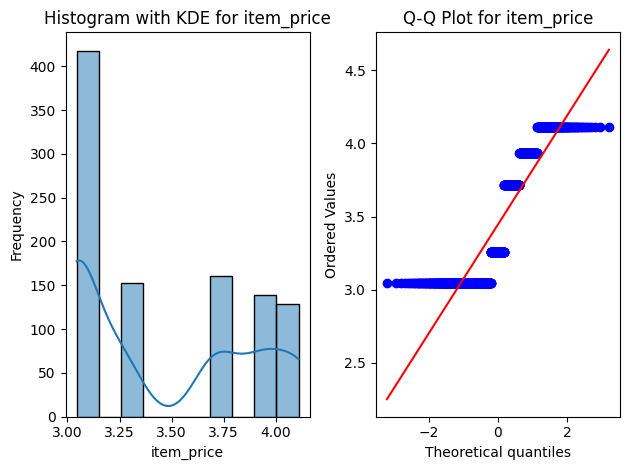

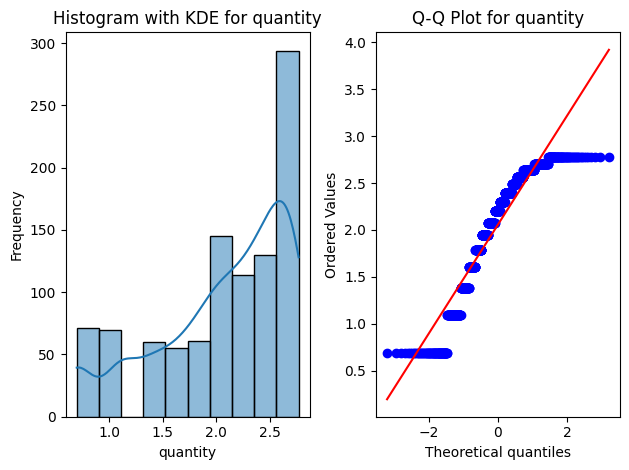

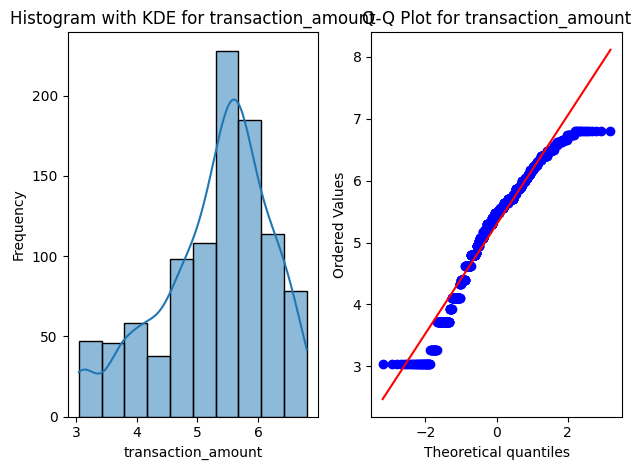

In [7]:
import numpy as np
log_data = np.log1p(df_numerical)  
for col in log_data.columns:
    plt.figure()
    plt.subplot(1, 2, 1)
    sns.histplot(log_data[col], kde=True, bins=10)
    plt.title(f'Histogram with KDE for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    probplot(log_data[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {col}')
    plt.tight_layout()
    plt.show()


### Use the transformed data
#### Split the transformed data

In [8]:
import numpy as np
transformed_data = df[['date', 'transaction_amount']].copy()
transformed_data['transaction_amount'] = np.log1p(transformed_data['transaction_amount'])
transformed_data = transformed_data.sort_values('date').reset_index(drop=True)
transformed_data.set_index('date', inplace=True)
train_size = int(len(transformed_data) * 0.8)

log_train_set = transformed_data[:train_size]
log_test_set = transformed_data[train_size:]

print(f"Length of training set: {len(log_train_set)}")
print(f"Length of testing set: {len(log_test_set)}")


Length of training set: 800
Length of testing set: 200


In [15]:
log_test_set.tail()

,transaction_amount
date,
2023-03-27,5.564520
2023-03-27,5.707110
2023-03-29,6.255750
2023-03-29,6.329721
2023-03-30,5.860786


#### Train an ARIMA model

This code trains an ARIMA model with specified parameters (4, 1, 0) on a log_train_set and forecasts values for the length of test_set. The model is fitted using the fit() method, and predictions are generated with forecast(). The Root Mean Squared Error (RMSE) is calculated by comparing the predicted values to the actual test_set values. Finally, the RMSE is printed to evaluate the model's forecasting accuracy. I used this parameter because it provides the best RMSE

In [70]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

log_arima_model = ARIMA(log_train_set, order=(4, 2, 12))  
log_arima_fit = log_arima_model.fit()
log_arima_forecast = log_arima_fit.forecast(steps=len(log_test_set))
log_arima_rmse = mean_squared_error(log_test_set, log_arima_forecast, squared=False)
log_arima_mape = mean_absolute_percentage_error(log_test_set, log_arima_forecast)
print(f"ARIMA RMSE: {log_arima_rmse}, MAPE: {log_arima_mape}")

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. f

ARIMA RMSE: 0.8846432142706796, MAPE: 0.1455016625943845


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_pre

#### Train an Exponential Smoothing model

The model is initialized with a linear trend (trend='add') and no seasonality (seasonal=None). It is trained on train_set using the fit() method, and future values are predicted for the length of test_set with forecast(). The Root Mean Squared Error (RMSE) is calculated by comparing the forecasted values to the actual test_set values, and the RMSE is printed to evaluate the model's accuracy.

In [74]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

log_es_model = ExponentialSmoothing(log_train_set, trend='add', seasonal=None)  
log_es_fit = log_es_model.fit()
log_es_forecast = log_es_fit.forecast(steps=len(log_test_set))
log_es_rmse = mean_squared_error(log_test_set, log_es_forecast, squared=False)
log_es_mape = mean_absolute_percentage_error(log_test_set, log_es_forecast)
print(f"Exponential Smoothing RMSE: {log_es_rmse}, MAPE: {log_es_mape}")

Exponential Smoothing RMSE: 0.8873416509060332, MAPE: 0.1463511390814921


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an

#### Train a Prophet model

The train_set is reformatted with columns ds (date) and y (transaction_amount) to meet Prophet's requirements, and the model is fitted to this data. A future dataframe is created to predict values for the length of test_set, and the forecasted values (yhat) are extracted. The RMSE is calculated to compare the forecasted values with test_set, and the result is printed to evaluate model performance.

In [36]:
from prophet import Prophet

train_prophet = log_train_set.reset_index()
train_prophet.columns = ['ds', 'y']  
prophet_model = Prophet()
prophet_model.fit(train_prophet)

future = prophet_model.make_future_dataframe(periods=len(log_test_set))
forecast = prophet_model.predict(future)
prophet_forecast = forecast['yhat'][-len(log_test_set):].values
prophet_rmse = mean_squared_error(log_test_set, prophet_forecast, squared=False)
prophet_mape = mean_absolute_percentage_error(log_test_set, prophet_forecast)
print(f"Prophet RMSE: {prophet_rmse}, MAPE: {prophet_mape}")


11:58:06 - cmdstanpy - INFO - Chain [1] start processing
11:58:06 - cmdstanpy - INFO - Chain [1] done processing


Prophet RMSE: 0.8998914666851353, MAPE: 0.1490012018437027


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Train a SARIMAX model

The SARIMAX function models both trend and seasonality, where order represents the ARIMA parameters (p, d, q), and seasonal_order captures the seasonal components (P, D, Q, s). The .forecast() method predicts values for the test set (log_test_set). Finally, the Root Mean Squared Error (RMSE) is calculated to evaluate the model’s predictive accuracy.

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

log_sarima_model = SARIMAX(
    log_train_set, 
    order=(1, 1, 1), 
    seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)
log_sarima_fit = log_sarima_model.fit()
log_sarima_forecast = log_sarima_fit.forecast(steps=len(log_test_set))
log_sarima_rmse = mean_squared_error(log_test_set, log_sarima_forecast, squared=False)
log_sarima_mape = mean_absolute_percentage_error(log_test_set, log_sarima_forecast)
print(f"SARIMA RMSE: {log_sarima_rmse}, MAPE: {log_sarima_mape}")



C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA RMSE: 0.8968652466714355, MAPE: 0.14700311568049718


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the

### Visualization of prediction

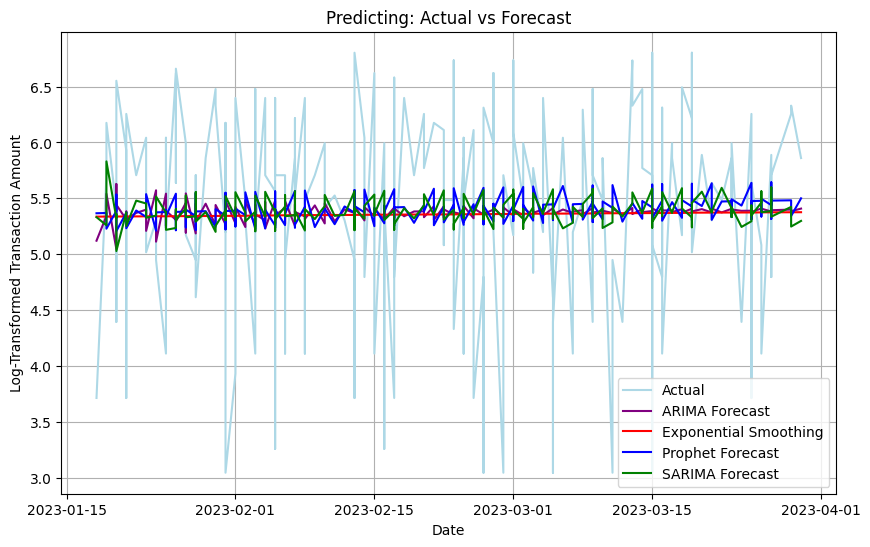

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(log_test_set.index, log_test_set, label='Actual', color='lightblue')
plt.plot(log_test_set.index, log_arima_forecast, label='ARIMA Forecast', color='purple')
plt.plot(log_test_set.index, log_es_forecast, label='Exponential Smoothing', color='red')
plt.plot(log_test_set.index, prophet_forecast, label='Prophet Forecast', color='blue')
plt.plot(log_test_set.index, log_sarima_forecast, label='SARIMA Forecast', color='green')
plt.title('Predicting: Actual vs Forecast')
plt.xlabel('Date')
plt.ylabel('Log-Transformed Transaction Amount')
plt.legend()
plt.grid()
plt.show()
